## Importing Packages


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import numpy as np
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve,auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading data
data=pd.read_csv('finaldata.csv')

In [ ]:
#Splitting features and target classes
y = data['class'] 
df=data.drop(['class'],axis=1)

In [ ]:
data['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()

In [ ]:
cols_pre= df.select_dtypes(include=['float64','int64']).columns
ss_df = scaler.fit_transform(df.select_dtypes(include=['float64','int64'] ))
ss_df = pd.DataFrame(ss_df, columns = cols_pre)

In [ ]:
cat = df.select_dtypes(include=['object']).copy()

In [ ]:
#one hot encoding of categorical features
cat=pd.get_dummies(data=cat)


In [ ]:
X = pd.concat([ss_df,cat],axis=1)
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,1,0,0,0,0,0,0,0,0,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,1,0,0,0,0,0,0,0,0,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,1,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Replacing Class Labels
y.replace('anomaly',1,inplace=True)
y.replace('normal',0,inplace=True)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

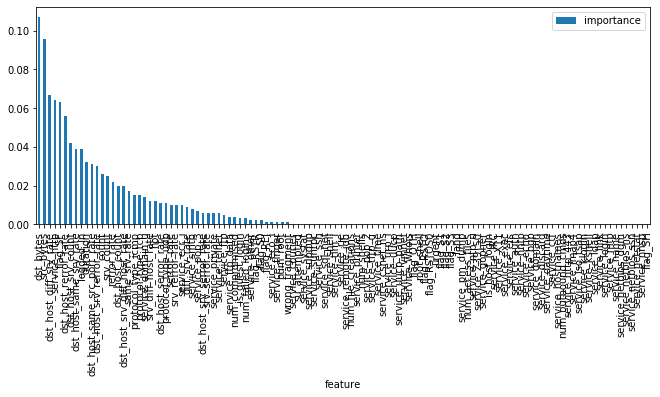

In [ ]:
# Feature Selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rf = RandomForestClassifier();
rf.fit(X_train, y_train);
score = np.round(rf.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rf = RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=65)
rfe = rfe.fit(X_train, y_train)

#summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]



In [ ]:
#Printing features
selected_features

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_auth',
 'service_domain',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_ntp_u',
 'service_other',
 'service_pm_dump

In [ ]:
## Transforming the data
X_train= rfe.transform(X_train)
X_test = rfe.transform(X_test)

## Baseline Models


## Decision Tree Model

In [ ]:
def DecisionTree(X_train, X_test, y_train, y_test):
   
    clf= DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    #print(clf.best_params_)
    
    # Printing scores
    pred=clf.predict(X_test)
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=clf.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return clf



Accuracy score: 0.9850680070963926
Precision: 0.987003
Recall: 0.986746
F1 score: 0.986875
Confusion Matrix:
 [[2866   50]
 [  51 3797]]
Sensitivity :  0.9825162838532739
Specificity :  0.9870028593709383
Negative predictive Value:  0.9867463617463618
Positive Predictive Value:  0.9828532235939643
Geometric Mean:  0.9847570164978211
AUCROC Value = 0.985297


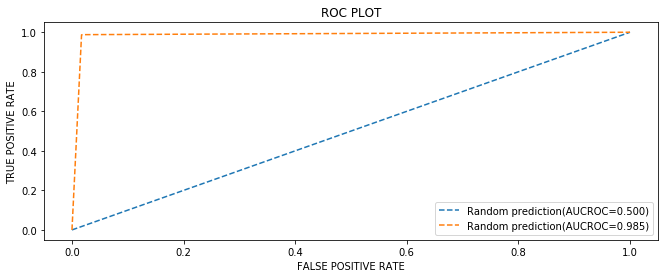

DecisionTreeClassifier()

In [ ]:
DecisionTree(X_train, X_test, y_train, y_test)

## SVM Model

In [ ]:
def SVM_model(X_train,y_train,X_test):

    clf = SVC(probability=True)
  
  # fitting the model for grid search
    clf.fit(X_train, y_train)
    pred= clf.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=clf.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()

  


    return clf

Accuracy score: 0.9705795387344767
Precision: 0.965552
Recall: 0.983368
F1 score: 0.974379
Confusion Matrix:
 [[2781  135]
 [  64 3784]]
Sensitivity :  0.9775043936731107
Specificity :  0.9655524368461342
Negative predictive Value:  0.9833679833679834
Positive Predictive Value:  0.9537037037037037
Geometric Mean:  0.9715100356346685
AUCROC Value = 0.994997


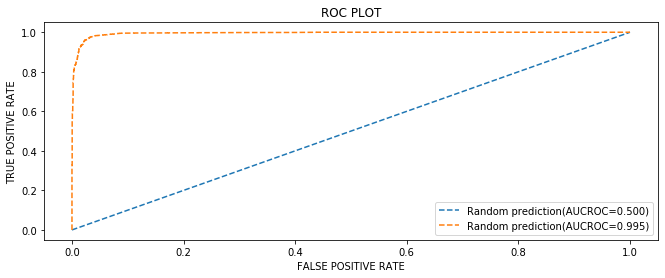

SVC(probability=True)

In [ ]:
SVM_model(X_train,y_train,X_test)

## Logisitic Regression Model

In [ ]:
def LR_model(X_train, X_test, y_train, y_test):  
    clf=LogisticRegression(max_iter=1000)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=clf.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()

    return clf

Accuracy score: 0.9587522176227085
Precision: 0.948254
Recall: 0.981029
F1 score: 0.964363
Confusion Matrix:
 [[2710  206]
 [  73 3775]]
Sensitivity :  0.9737693136902623
Specificity :  0.9482542074855564
Negative predictive Value:  0.981029106029106
Positive Predictive Value:  0.9293552812071331
Geometric Mean:  0.9609270777884833
AUCROC Value = 0.983760


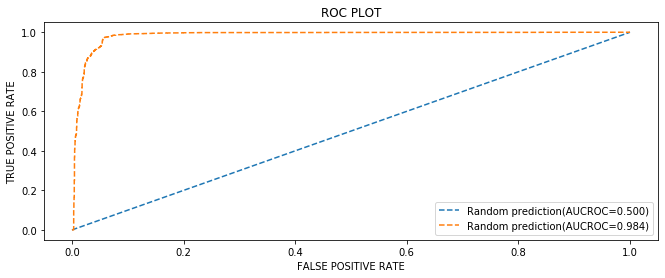

LogisticRegression(max_iter=1000)

In [ ]:
LR_model(X_train, X_test, y_train, y_test)

## Naive Bayes

In [ ]:
def NB_model(X_train, X_test, y_train, y_test):

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=clf.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()

    return clf
  

Accuracy score: 0.9117386162034299
Precision: 0.962710
Recall: 0.878898
F1 score: 0.918897
Confusion Matrix:
 [[2785  131]
 [ 466 3382]]
Sensitivity :  0.8566594893878806
Specificity :  0.9627099345288926
Negative predictive Value:  0.8788981288981289
Positive Predictive Value:  0.9550754458161865
Geometric Mean:  0.9081379856289247
AUCROC Value = 0.964964


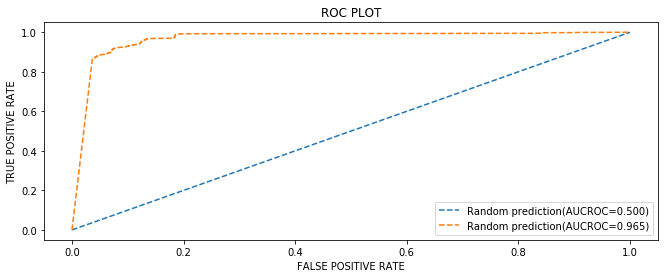

GaussianNB()

In [ ]:
NB_model(X_train, X_test, y_train, y_test)

## KNN Model

In [ ]:
def KNN_model(X_train, X_test, y_train, y_test):

    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=clf.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()

    return clf
  

Accuracy score: 0.972501478415139
Precision: 0.976823
Recall: 0.974792
F1 score: 0.975806
Confusion Matrix:
 [[2827   89]
 [  97 3751]]
Sensitivity :  0.9668262653898769
Specificity :  0.9768229166666667
Negative predictive Value:  0.9747920997920998
Positive Predictive Value:  0.9694787379972565
Geometric Mean:  0.9718117371528707
AUCROC Value = 0.993098


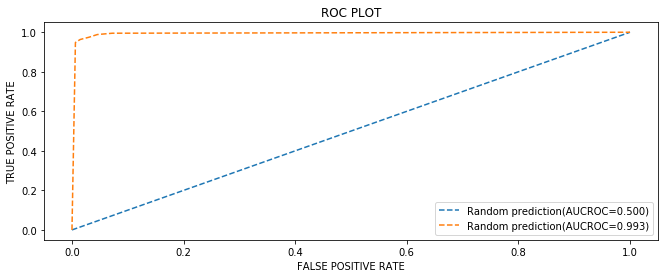

KNeighborsClassifier()

In [ ]:
KNN_model(X_train, X_test, y_train, y_test)

In [ ]:
! pip install pyswarms

In [ ]:
#Particle Swarm Optimization 
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
#from pyswarms.utils.environments import PlotEnvironment
%load_ext autoreload
%autoreload 2
options = {'c1': 0.8, 'c2': 0.6, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=X_test.shape[0],dimensions=X_test.shape[1], options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)


2021-12-04 18:19:14,389 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.8, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.26e-36
2021-12-04 18:19:59,743 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2592189838289418e-36, best pos: [ 2.93577856e-19 -1.77338388e-19 -1.71738135e-19 -2.86912768e-19
 -2.10930805e-19  3.72511711e-20 -7.99566661e-20 -6.37490793e-20
 -5.51698552e-21 -6.45075177e-20 -2.89354166e-20  1.30682619e-19
 -1.36679889e-19 -1.81656604e-19  1.47626788e-19 -4.13832699e-20
 -3.19986090e-19 -3.48563991e-19  6.17416469e-20  9.54815215e-20
  1.37114804e-19  1.66100165e-20 -1.02278894e-19 -8.00952216e-21
 -3.00205660e-20  9.72511705e-20 -1.16120029e-19  2.06201554e-19
  1.30258583e-19 -1.30905029e-19  1.31215277e-20 -8.28611531e-21
  1.77233495e-19  8.06432656e-20  1.60300113e-19 -5.25514145e-20
  9.19090898e-21 -1.45061457e-19  5.65462774e-20 -1.31649331e-19
  9.03249188e-20  

In [ ]:
weight=list(pos[0:12])

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# Voting Classifier

## Ensemble -  6 Decision Tree and 6 Logistic Regression

In [ ]:
def ensemble1(X_train,y_train,X_test,y_test,weight):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    estimators = []
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
      DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
      estimators.append(("Decision_Tree_{} ,".format(No),DT))
    leng1 = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng1):
        LR = LogisticRegression(C=n, max_iter=1000 )
        estimators.append(("Logistic_Reression{} ,".format(No),LR))
    lr_dt =VotingClassifier(estimators = estimators, voting='soft',weights=weight)
    lr_dt = lr_dt.fit(X_train,y_train)
    pred=  lr_dt.predict(X_test)
    
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=lr_dt.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    return lr_dt

Accuracy score: 0.9785629804849202
Precision: 0.966961
Recall: 0.996362
F1 score: 0.981441
Confusion Matrix:
 [[2785  131]
 [  14 3834]]
Sensitivity :  0.9949982136477313
Specificity :  0.9669609079445145
Negative predictive Value:  0.9963617463617463
Positive Predictive Value:  0.9550754458161865
Geometric Mean:  0.9808793891564754
AUCROC Value = 0.994536


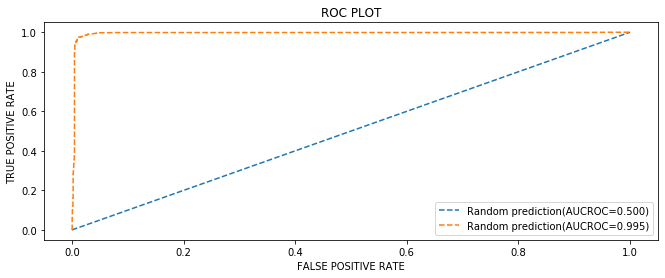

VotingClassifier(estimators=[('Decision_Tree_1 ,',
                              DecisionTreeClassifier(max_depth=2)),
                             ('Decision_Tree_2 ,',
                              DecisionTreeClassifier(max_depth=4)),
                             ('Decision_Tree_3 ,',
                              DecisionTreeClassifier(max_depth=6)),
                             ('Decision_Tree_4 ,',
                              DecisionTreeClassifier(max_depth=8)),
                             ('Decision_Tree_5 ,',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Decision_Tree_6 ,',
                              DecisionTreeCla...
                             ('Logistic_Reression6 ,',
                              LogisticRegression(C=0.001, max_iter=1000))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.7733838836681835e-19,
                          -1.7173813471055555e-19, -2.8691276798511

In [ ]:
ensemble1(X_train,y_train,X_test,y_test,weight)

## Ensemble - 6 Logistic Regression and 6 KNN

In [ ]:
def ensemble2(X_train,y_train,X_test,y_test,weight):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1=[]
    
    leng = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng):
        LR = LogisticRegression(C=n )
        estimators1.append(("Logistic_Reression{} ,".format(No),LR))
    
    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    lr_knn =VotingClassifier(estimators = estimators1, voting='soft',weights=weight)
    lr_knn = lr_knn.fit(X_train,y_train)
    pred=  lr_knn.predict(X_test)
  
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=lr_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    return lr_knn

Accuracy score: 0.9615612063867534
Precision: 0.955561
Recall: 0.977911
F1 score: 0.966607
Confusion Matrix:
 [[2741  175]
 [  85 3763]]
Sensitivity :  0.9699221514508138
Specificity :  0.9555611985779584
Negative predictive Value:  0.9779106029106029
Positive Predictive Value:  0.9399862825788752
Geometric Mean:  0.9627148973437836
AUCROC Value = 0.993006


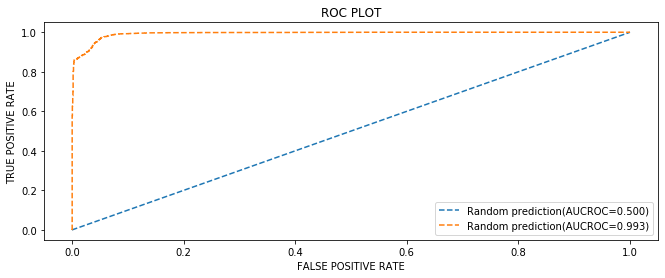

VotingClassifier(estimators=[('Logistic_Reression1 ,',
                              LogisticRegression(C=100)),
                             ('Logistic_Reression2 ,',
                              LogisticRegression(C=10)),
                             ('Logistic_Reression3 ,', LogisticRegression(C=1)),
                             ('Logistic_Reression4 ,',
                              LogisticRegression(C=0.1)),
                             ('Logistic_Reression5 ,',
                              LogisticRegression(C=0.01)),
                             ('Logistic_Reression6 ,',
                              LogisticRegression(C=0.001)),
                             ('Knn_1 ,',
                              KNeig...
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=11))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.7733838836681835e-19,
                         

In [ ]:
ensemble2(X_train,y_train,X_test,y_test,weight)

## Ensemble - 6 Decision Tree and 6 KNN

In [ ]:
def ensemble3(X_train,y_train,X_test,y_test,weight):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
      DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
      estimators1.append(("Decision_Tree_{} ,".format(No),DT))

    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    dt_knn =VotingClassifier(estimators = estimators1, voting='soft',weights=weight)
    dt_knn = dt_knn.fit(X_train,y_train)
    pred=  dt_knn.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=dt_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return dt_knn

Accuracy score: 0.9793021880544057
Precision: 0.968182
Recall: 0.996362
F1 score: 0.982070
Confusion Matrix:
 [[2790  126]
 [  14 3834]]
Sensitivity :  0.9950071326676176
Specificity :  0.9681818181818181
Negative predictive Value:  0.9963617463617463
Positive Predictive Value:  0.9567901234567902
Geometric Mean:  0.9815028348456318
AUCROC Value = 0.995359


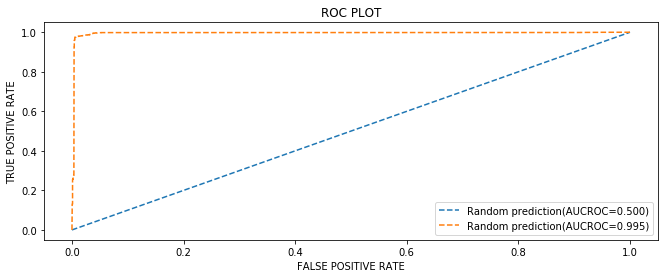

VotingClassifier(estimators=[('Decision_Tree_1 ,',
                              DecisionTreeClassifier(max_depth=2)),
                             ('Decision_Tree_2 ,',
                              DecisionTreeClassifier(max_depth=4)),
                             ('Decision_Tree_3 ,',
                              DecisionTreeClassifier(max_depth=6)),
                             ('Decision_Tree_4 ,',
                              DecisionTreeClassifier(max_depth=8)),
                             ('Decision_Tree_5 ,',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Decision_Tree_6 ,',
                              DecisionTreeCla...
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=11))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.7733838836681835e-19,
                          -1.7173813471055555e-19, -2.869

In [ ]:
ensemble3(X_train,y_train,X_test,y_test,weight)

 ## Ensemble - 6 SVM and 6 KNN

In [ ]:
def ensemble4(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))

    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    svm_knn =VotingClassifier(estimators = estimators1, voting='soft',weights=weight)
    svm_knn = svm_knn.fit(X_train,y_train)
    pred=  svm_knn.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_knn

Accuracy score: 0.9648137196924896
Precision: 0.957657
Recall: 0.981549
F1 score: 0.969456
Confusion Matrix:
 [[2749  167]
 [  71 3777]]
Sensitivity :  0.974822695035461
Specificity :  0.9576572008113591
Negative predictive Value:  0.9815488565488566
Positive Predictive Value:  0.9427297668038409
Geometric Mean:  0.9662018285094708
AUCROC Value = 0.990074


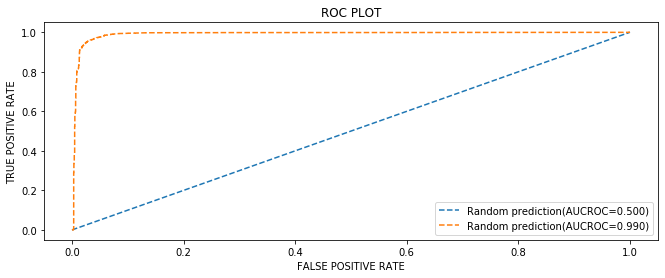

VotingClassifier(estimators=[('SVM_1 ,',
                              SVC(C=5, gamma='auto', probability=True)),
                             ('SVM_2 ,',
                              SVC(C=2, gamma='auto', probability=True)),
                             ('SVM_3 ,',
                              SVC(C=1, gamma='auto', probability=True)),
                             ('SVM_4 ,',
                              SVC(C=0.5, gamma='auto', probability=True)),
                             ('SVM_5 ,',
                              SVC(C=0.2, gamma='auto', probability=True)),
                             ('SVM_6 ,',
                              SVC(C=0.1, gamma='auto', probability=True)),
                             ('Knn_1 ,',
                              KNeig...
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=11))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.77338

In [ ]:
ensemble4(X_train,y_train,X_test,y_test)

##  Ensemble -6 SVM and 6 DT

In [ ]:
def ensemble5(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
        DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
        estimators1.append(("Decision_Tree_{} ,".format(No),DT))

    
    svm_dt =VotingClassifier(estimators = estimators1, voting='soft',weights=weight)
    svm_dt = svm_dt.fit(X_train,y_train)
    pred=  svm_dt.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_dt.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_dt

Accuracy score: 0.9617090479006505
Precision: 0.954419
Recall: 0.979470
F1 score: 0.966782
Confusion Matrix:
 [[2736  180]
 [  79 3769]]
Sensitivity :  0.9719360568383659
Specificity :  0.9544188402127121
Negative predictive Value:  0.9794698544698545
Positive Predictive Value:  0.9382716049382716
Geometric Mean:  0.9631376247082188
AUCROC Value = 0.981003


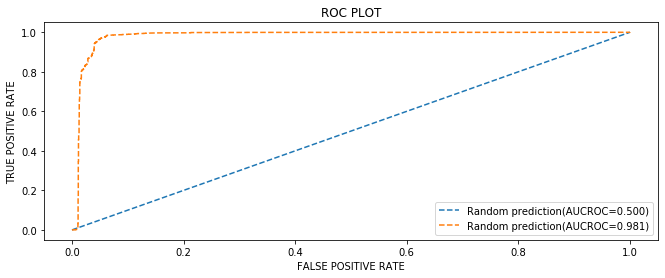

VotingClassifier(estimators=[('SVM_1 ,',
                              SVC(C=5, gamma='auto', probability=True)),
                             ('SVM_2 ,',
                              SVC(C=2, gamma='auto', probability=True)),
                             ('SVM_3 ,',
                              SVC(C=1, gamma='auto', probability=True)),
                             ('SVM_4 ,',
                              SVC(C=0.5, gamma='auto', probability=True)),
                             ('SVM_5 ,',
                              SVC(C=0.2, gamma='auto', probability=True)),
                             ('SVM_6 ,',
                              SVC(C=0.1, gamma='auto', probability=True)),
                             ('Decision_Tree...
                             ('Decision_Tree_6 ,',
                              DecisionTreeClassifier(max_depth=12))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.7733838836681835e-19,
                          -1.717381

In [ ]:
ensemble5(X_train,y_train,X_test,y_test)

Ensemble -  6 SVM and 6 LR

In [ ]:
def ensemble6(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))
    leng = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng):
        LR = LogisticRegression(C=n, max_iter=1000 )
        estimators1.append(("Logistic_Reression{} ,".format(No),LR))
    
    svm_lr =VotingClassifier(estimators = estimators1, voting='soft',weights=weight)
    svm_lr = svm_lr.fit(X_train,y_train)
    pred=  svm_lr.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_lr.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_lr

Accuracy score: 0.9627439384979303
Precision: 0.956345
Recall: 0.979210
F1 score: 0.967643
Confusion Matrix:
 [[2744  172]
 [  80 3768]]
Sensitivity :  0.9716713881019831
Specificity :  0.9563451776649746
Negative predictive Value:  0.9792099792099792
Positive Predictive Value:  0.9410150891632373
Geometric Mean:  0.9639778245822689
AUCROC Value = 0.983051


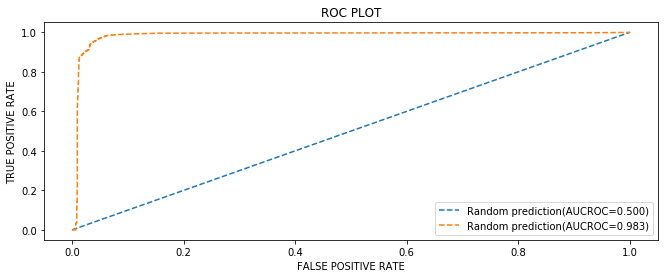

VotingClassifier(estimators=[('SVM_1 ,',
                              SVC(C=5, gamma='auto', probability=True)),
                             ('SVM_2 ,',
                              SVC(C=2, gamma='auto', probability=True)),
                             ('SVM_3 ,',
                              SVC(C=1, gamma='auto', probability=True)),
                             ('SVM_4 ,',
                              SVC(C=0.5, gamma='auto', probability=True)),
                             ('SVM_5 ,',
                              SVC(C=0.2, gamma='auto', probability=True)),
                             ('SVM_6 ,',
                              SVC(C=0.1, gamma='auto', probability=True)),
                             ('Logistic_Rere...
                             ('Logistic_Reression6 ,',
                              LogisticRegression(C=0.001, max_iter=1000))],
                 voting='soft',
                 weights=[2.935778557074199e-19, -1.7733838836681835e-19,
                         

In [ ]:
ensemble6(X_train,y_train,X_test,y_test)

# Stacking

## Ensemble - 6 LR and 6 DT

In [ ]:
#Stacking Classifier
def stacking(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    estimators = []
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
      DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
      estimators.append(("Decision_Tree_{} ,".format(No),DT))
    leng1 = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng1):
        LR = LogisticRegression(C=n, max_iter=1000 )
        estimators.append(("Logistic_Reression{} ,".format(No),LR))
    lr_dt= StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    lr_dt = lr_dt.fit(X_train,y_train)
    pred=  lr_dt.predict(X_test)
    
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=lr_dt.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    return lr_dt

Accuracy score: 0.984033116499113
Precision: 0.979487
Recall: 0.992723
F1 score: 0.986061
Confusion Matrix:
 [[2836   80]
 [  28 3820]]
Sensitivity :  0.9902234636871509
Specificity :  0.9794871794871794
Negative predictive Value:  0.9927234927234927
Positive Predictive Value:  0.9725651577503429
Geometric Mean:  0.9848406914364134
AUCROC Value = 0.998123


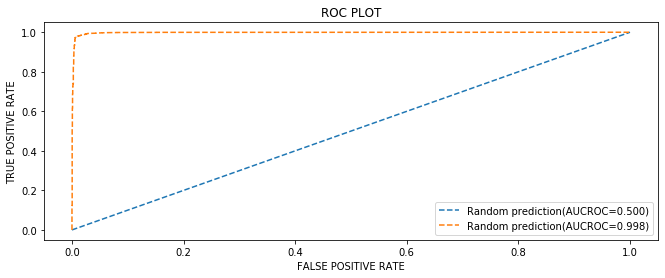

StackingClassifier(estimators=[('Decision_Tree_1 ,',
                                DecisionTreeClassifier(max_depth=2)),
                               ('Decision_Tree_2 ,',
                                DecisionTreeClassifier(max_depth=4)),
                               ('Decision_Tree_3 ,',
                                DecisionTreeClassifier(max_depth=6)),
                               ('Decision_Tree_4 ,',
                                DecisionTreeClassifier(max_depth=8)),
                               ('Decision_Tree_5 ,',
                                DecisionTreeClassifier(max_depth=10)),
                               ('Decision_Tree_6 ,',
                                DecisionTreeC...
                               ('Logistic_Reression2 ,',
                                LogisticRegression(C=10, max_iter=1000)),
                               ('Logistic_Reression3 ,',
                                LogisticRegression(C=1, max_iter=1000)),
                     

In [ ]:
stacking(X_train,y_train,X_test,y_test)


## Ensemble - 6 LR and 6 KNN

In [ ]:
def stacking1(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1=[]
    
    leng = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng):
        LR = LogisticRegression(C=n )
        estimators1.append(("Logistic_Reression{} ,".format(No),LR))
    
    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    lr_knn = StackingClassifier(
     estimators=estimators1, final_estimator=LogisticRegression())
    lr_knn = lr_knn.fit(X_train,y_train)
    pred=  lr_knn.predict(X_test)
  
    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=lr_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    return lr_knn

Accuracy score: 0.9741277350680071
Precision: 0.976147
Recall: 0.978430
F1 score: 0.977287
Confusion Matrix:
 [[2824   92]
 [  83 3765]]
Sensitivity :  0.9714482284141727
Specificity :  0.9761472647135079
Negative predictive Value:  0.9784303534303534
Positive Predictive Value:  0.9684499314128944
Geometric Mean:  0.9737949121746723
AUCROC Value = 0.997420


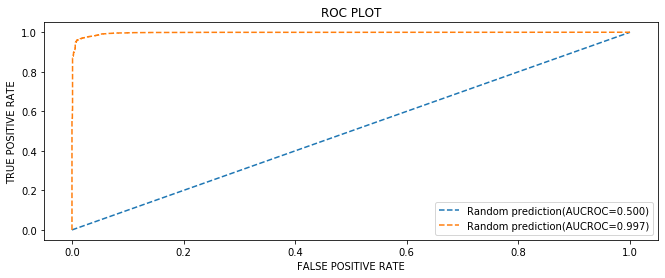

StackingClassifier(estimators=[('Logistic_Reression1 ,',
                                LogisticRegression(C=100)),
                               ('Logistic_Reression2 ,',
                                LogisticRegression(C=10)),
                               ('Logistic_Reression3 ,',
                                LogisticRegression(C=1)),
                               ('Logistic_Reression4 ,',
                                LogisticRegression(C=0.1)),
                               ('Logistic_Reression5 ,',
                                LogisticRegression(C=0.01)),
                               ('Logistic_Reression6 ,',
                                LogisticRegression(C=0.001)),
                               ('Knn_1 ,',
                                KNe...
                               ('Knn_2 ,',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                              

In [ ]:
stacking1(X_train,y_train,X_test,y_test)

Ensemble - 6 DT and 6 KNN

In [ ]:
def stacking2(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
      DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
      estimators1.append(("Decision_Tree_{} ,".format(No),DT))

    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    dt_knn =StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression())
    dt_knn = dt_knn.fit(X_train,y_train)
    pred=  dt_knn.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=dt_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return dt_knn

Accuracy score: 0.9838852749852158
Precision: 0.984703
Recall: 0.987006
F1 score: 0.985853
Confusion Matrix:
 [[2857   59]
 [  50 3798]]
Sensitivity :  0.9828001375988992
Specificity :  0.9847031371532279
Negative predictive Value:  0.987006237006237
Positive Predictive Value:  0.9797668038408779
Geometric Mean:  0.983751177223316
AUCROC Value = 0.999005


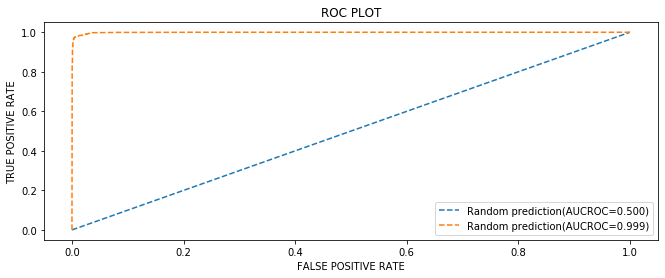

StackingClassifier(estimators=[('Decision_Tree_1 ,',
                                DecisionTreeClassifier(max_depth=2)),
                               ('Decision_Tree_2 ,',
                                DecisionTreeClassifier(max_depth=4)),
                               ('Decision_Tree_3 ,',
                                DecisionTreeClassifier(max_depth=6)),
                               ('Decision_Tree_4 ,',
                                DecisionTreeClassifier(max_depth=8)),
                               ('Decision_Tree_5 ,',
                                DecisionTreeClassifier(max_depth=10)),
                               ('Decision_Tree_6 ,',
                                DecisionTreeC...
                               ('Knn_2 ,',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                               ('Knn_3 ,',
                                KNeighborsClassifier(

In [ ]:
stacking2(X_train,y_train,X_test,y_test)

## Ensemble 6 SVM and 6 KNN

In [ ]:
def stacking3(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))

    for n,No in zip(([1,3,5,7,9,11]),leng):
        KNN = KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean')
        estimators1.append(("Knn_{} ,".format(No),KNN))
 
    
    svm_knn =StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression())
    svm_knn = svm_knn.fit(X_train,y_train)
    pred=  svm_knn.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_knn.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_knn

Accuracy score: 0.9738320520402128
Precision: 0.977373
Recall: 0.976611
F1 score: 0.976992
Confusion Matrix:
 [[2829   87]
 [  90 3758]]
Sensitivity :  0.9691675231243576
Specificity :  0.9773732119635891
Negative predictive Value:  0.9766112266112266
Positive Predictive Value:  0.970164609053498
Geometric Mean:  0.9732617196863593
AUCROC Value = 0.997692


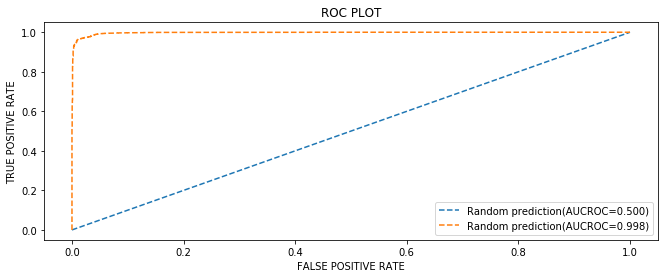

StackingClassifier(estimators=[('SVM_1 ,',
                                SVC(C=5, gamma='auto', probability=True)),
                               ('SVM_2 ,',
                                SVC(C=2, gamma='auto', probability=True)),
                               ('SVM_3 ,',
                                SVC(C=1, gamma='auto', probability=True)),
                               ('SVM_4 ,',
                                SVC(C=0.5, gamma='auto', probability=True)),
                               ('SVM_5 ,',
                                SVC(C=0.2, gamma='auto', probability=True)),
                               ('SVM_6 ,',
                                SVC(C=0.1, gamma='auto', probability=True)),
                               ('Knn_1 ,',
                                KNe...
                               ('Knn_2 ,',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                  

In [ ]:
stacking3(X_train,y_train,X_test,y_test)

## Ensemble - 6 SVM and  6DT

In [ ]:
def stacking4(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))
    leng = [1,2,3,4,5,6]
    for n,No in zip(([2,4,6,8,10,12]),leng):
        DT = DecisionTreeClassifier(max_depth=n, criterion ='gini')
        estimators1.append(("Decision_Tree_{} ,".format(No),DT))

    
    svm_dt =StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression())
    svm_dt = svm_dt.fit(X_train,y_train)
    pred=  svm_dt.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_dt.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_dt

Accuracy score: 0.9847723240685985
Precision: 0.983975
Recall: 0.989345
F1 score: 0.986653
Confusion Matrix:
 [[2854   62]
 [  41 3807]]
Sensitivity :  0.9858376511226252
Specificity :  0.9839751873869217
Negative predictive Value:  0.9893451143451143
Positive Predictive Value:  0.9787379972565158
Geometric Mean:  0.984905979013463
AUCROC Value = 0.998933


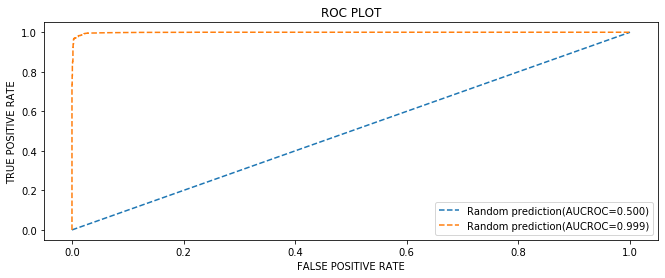

StackingClassifier(estimators=[('SVM_1 ,',
                                SVC(C=5, gamma='auto', probability=True)),
                               ('SVM_2 ,',
                                SVC(C=2, gamma='auto', probability=True)),
                               ('SVM_3 ,',
                                SVC(C=1, gamma='auto', probability=True)),
                               ('SVM_4 ,',
                                SVC(C=0.5, gamma='auto', probability=True)),
                               ('SVM_5 ,',
                                SVC(C=0.2, gamma='auto', probability=True)),
                               ('SVM_6 ,',
                                SVC(C=0.1, gamma='auto', probability=True)),
                               ('Decision_Tr...
                                DecisionTreeClassifier(max_depth=2)),
                               ('Decision_Tree_2 ,',
                                DecisionTreeClassifier(max_depth=4)),
                               ('Decision_Tre

In [ ]:
stacking4(X_train,y_train,X_test,y_test)

## Ensemble - 6 SVM and  6LR

In [ ]:
def stacking5(X_train,y_train,X_test,y_test):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    estimators1 = []
    leng = [1,2,3,4,5,6]
    estimators = []
    for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
      SVM = SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True)
      estimators1.append(("SVM_{} ,".format(No),SVM))
    leng = [1,2,3,4,5,6]
    for n,No in zip(([100,10,1,0.1,0.01,0.001]),leng):
        LR = LogisticRegression(C=n, max_iter=1000 )
        estimators1.append(("Logistic_Reression{} ,".format(No),LR))
    
    svm_lr =StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression())
    svm_lr = svm_lr.fit(X_train,y_train)
    pred=  svm_lr.predict(X_test)

    print('Accuracy score:', accuracy_score(y_test, pred))

    precision = precision_score(y_test, pred)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, pred)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, pred)
    print('F1 score: %f' % f1)
    
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix:\n',cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Specificity : ', specificity)

    NPV = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Negative predictive Value: ', NPV)

    PPV = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Positive Predictive Value: ', PPV)

    import math
    gm=math.sqrt(specificity*sensitivity)
    print('Geometric Mean: ', gm)
    
    
    # Printing AUC_ROC and AUC_PRC scores
    
    
    r_probs=[0 for _ in range(len(y_test))]
    probs=svm_lr.predict_proba(X_test)
    probs=probs[:,1]
    
    auc =roc_auc_score(y_test,r_probs)
    r_auc =roc_auc_score(y_test,probs)
    print('AUCROC Value = %4f'%(r_auc))
    
    r_fpr, r_tpr, thresholds = metrics.roc_curve(y_test, r_probs, pos_label=1)
    fpr,tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

    #ROC PLOT
    import matplotlib.pyplot as plt
    plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%auc)
    plt.plot(fpr,tpr,linestyle='--',label='Random prediction(AUCROC=%0.3f)'%r_auc)
    plt.title('ROC PLOT')
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')
    plt.legend()
    plt.show()
    
    return svm_lr

Accuracy score: 0.9723536369012419
Precision: 0.971657
Recall: 0.979990
F1 score: 0.975805
Confusion Matrix:
 [[2806  110]
 [  77 3771]]
Sensitivity :  0.9732917100242803
Specificity :  0.9716567894872455
Negative predictive Value:  0.979989604989605
Positive Predictive Value:  0.9622770919067215
Geometric Mean:  0.9724739061778179
AUCROC Value = 0.995682


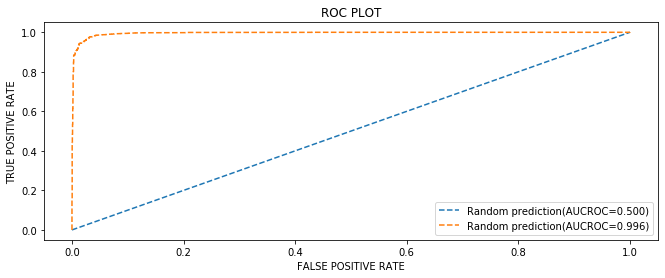

StackingClassifier(estimators=[('SVM_1 ,',
                                SVC(C=5, gamma='auto', probability=True)),
                               ('SVM_2 ,',
                                SVC(C=2, gamma='auto', probability=True)),
                               ('SVM_3 ,',
                                SVC(C=1, gamma='auto', probability=True)),
                               ('SVM_4 ,',
                                SVC(C=0.5, gamma='auto', probability=True)),
                               ('SVM_5 ,',
                                SVC(C=0.2, gamma='auto', probability=True)),
                               ('SVM_6 ,',
                                SVC(C=0.1, gamma='auto', probability=True)),
                               ('Logistic_Re...
                               ('Logistic_Reression2 ,',
                                LogisticRegression(C=10, max_iter=1000)),
                               ('Logistic_Reression3 ,',
                                LogisticRegression

In [ ]:
stacking5(X_train,y_train,X_test,y_test)